In [1]:
import numpy as np
import pandas as pd
import kmapper as km
import networkx as nx
import matplotlib 
import sklearn
from sklearn import ensemble

from mapper import Coal_Mapper

import warnings
warnings.filterwarnings("ignore")

# Testing with Breast Cancer Data Set

In [2]:
df = pd.read_csv("/Users/jeremy.wayland/Downloads/data.csv")
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["diagnosis"])

In [3]:
test = Coal_Mapper(X=X)

In [4]:
test.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        0.000e+00]])

In [5]:
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()



In [6]:
test.lens = np.c_[lens1, lens2]
test.clusterer = sklearn.cluster.KMeans(n_clusters=2, random_state=1618033)

In [7]:
test.compute_mapper(n_cubes=2, perc_overlap=0.4)

In [8]:
test.mapper

{'nodes': defaultdict(list,
             {'cube0_cluster0': [0,
               12,
               18,
               23,
               24,
               25,
               42,
               72,
               77,
               78,
               82,
               83,
               108,
               119,
               122,
               161,
               164,
               181,
               197,
               202,
               210,
               219,
               233,
               237,
               250,
               252,
               256,
               260,
               272,
               302,
               323,
               343,
               366,
               369,
               373,
               389,
               393,
               400,
               417,
               449,
               451,
               468,
               491,
               503,
               521,
               563,
               564,
               565,
       

In [9]:
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(
    lens,
    X,
    cover=km.Cover(n_cubes=2, perc_overlap=0.4),
    clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1618033),#nerve=trial_nerve
)

KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (569, 31) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 2
Creating 4 hypercubes.
   > Found 2 clusters in hypercube 0.
   > Found 2 clusters in hypercube 1.
   > Found 2 clusters in hypercube 2.
   > Found 2 clusters in hypercube 3.

Created 13 edges and 8 nodes in 0:00:00.032347.


In [10]:
graph["nodes"] == test.mapper['nodes']

True

In [11]:
graph["links"] == test.mapper['links']

True

In [12]:
graph["simplices"] == test.mapper['simplices']

True

In [13]:
G = test.mapper_to_networkx()

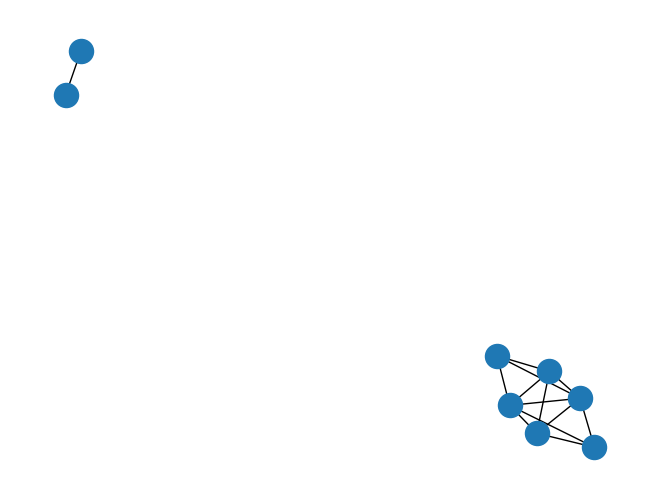

In [14]:
nx.draw(G)

In [15]:
a,b = test.connected_components()

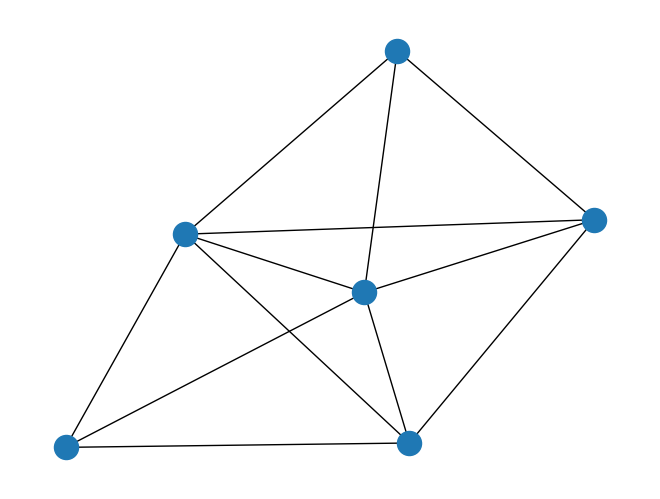

In [16]:
nx.draw(a)

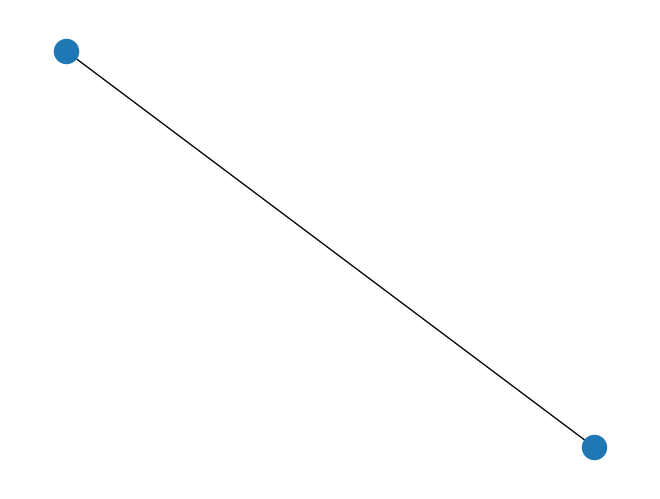

In [17]:
nx.draw(b)

In [18]:
test.item_lookup(0)

({'cube0_cluster0': [0,
   12,
   18,
   23,
   24,
   25,
   42,
   72,
   77,
   78,
   82,
   83,
   108,
   119,
   122,
   161,
   164,
   181,
   197,
   202,
   210,
   219,
   233,
   237,
   250,
   252,
   256,
   260,
   272,
   302,
   323,
   343,
   366,
   369,
   373,
   389,
   393,
   400,
   417,
   449,
   451,
   468,
   491,
   503,
   521,
   563,
   564,
   565,
   567],
  'cube1_cluster0': [0,
   18,
   24,
   42,
   72,
   77,
   78,
   108,
   122,
   161,
   181,
   202,
   210,
   219,
   233,
   237,
   250,
   252,
   256,
   260,
   272,
   302,
   323,
   343,
   366,
   369,
   373,
   393,
   417,
   449,
   451,
   563,
   564,
   565,
   567],
  'cube2_cluster0': [0,
   1,
   2,
   4,
   6,
   10,
   11,
   17,
   18,
   23,
   24,
   25,
   27,
   28,
   29,
   30,
   32,
   33,
   34,
   35,
   42,
   45,
   53,
   56,
   70,
   72,
   75,
   77,
   83,
   85,
   87,
   95,
   118,
   119,
   121,
   127,
   129,
   131,
   132,
   134,
   141,
  

In [24]:
 subgraph_nodes = set.union(
            *[nx.node_connected_component(test.graph, node) for node in clusters.keys()]
        )

In [25]:
subgraph_nodes

{'cube0_cluster0',
 'cube1_cluster0',
 'cube1_cluster1',
 'cube2_cluster0',
 'cube3_cluster0',
 'cube3_cluster1'}

In [27]:
subgraph = test.graph.subgraph(subgraph_nodes)

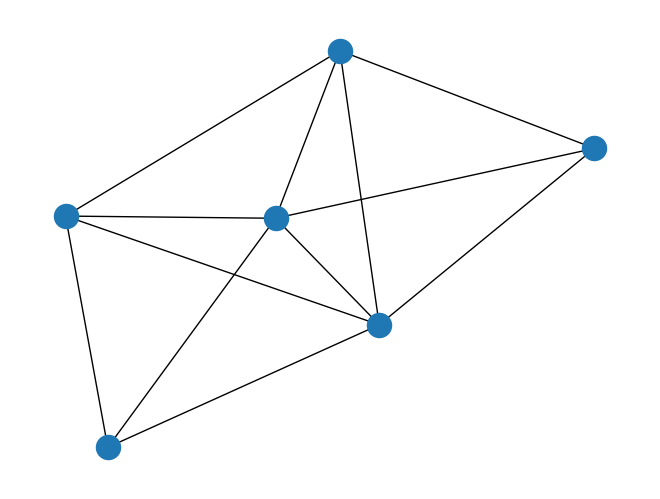

In [28]:
nx.draw(subgraph)